## Install required libraries if needed and check GPU





In [1]:
!pip install ultralytics
!pip install roboflow
!nvidia-smi


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.6/922.6 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

## import libraries


In [5]:
from ultralytics import YOLO
from roboflow import Roboflow
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
!yolo checks

Ultralytics 8.3.86 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (AMD EPYC 7B12)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 39.4/225.8 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.11.11
Install             pip
Path                /usr/local/lib/python3.11/dist-packages/ultralytics
RAM                 50.99 GB
Disk                39.4/225.8 GB
CPU                 AMD EPYC 7B12
CPU count           8
GPU                 None
GPU count           None
CUDA                None

numpy               ✅ 1.26.4<=2.1.1,>=1.23.0
matplotlib          ✅ 3.10.0>=3.3.0
opencv-python       ✅ 4.11.0.86>=4.6.0
pillow              ✅ 11.1.0>=7.1.2
pyyaml              ✅ 6.0.2>=5.3.1
requests            ✅ 2.32.3>=2.23.0
scipy               ✅ 1.13.1>=1.4.1
torch               ✅ 2.5.1+cu124>=1.8.0
torch               ✅ 2.5.1+cu124!=2.4.0,>=1.8.0; sys_platform == "win32"
torchvision         ✅ 0.20.1+cu124>=0.9.0
tqdm                ✅ 4.67.1>=4.64.0
psutil 

## Download dataset by pasting the paste text from roboflow


In [ ]:
rf = Roboflow(api_key="API")
project = rf.workspace("space-debris-veh5c").project("space-debris-mugw2-jrufd-apdqa")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Space-debris-1 in yolov8:: 100%|██████████| 2550/2550 [00:00<00:00, 9291.11it/s]


# Train

In [5]:
model = YOLO("yolov8x")

results = model.train(
    data="/content/Space-debris-1/data.yaml",
    epochs=200,
    batch=16,
    imgsz=960,
    lr0=0.001,
    optimizer='SGD',
    augment=True,
    pretrained=True
)


100%|██████████| 131M/131M [00:00<00:00, 252MB/s] 


Ultralytics 8.3.86 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/Space-debris-1/data.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=960, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

100%|██████████| 755k/755k [00:00<00:00, 129MB/s]


Overriding model.yaml nc=80 with nc=11

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 316MB/s]


AMP: checks passed ✅


train: Scanning /content/Space-debris-1/train/labels... 907 images, 0 backgrounds, 0 corrupt: 100%|██████████| 907/907 [00:00<00:00, 1489.51it/s]


train: New cache created: /content/Space-debris-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Space-debris-1/valid/labels... 239 images, 0 backgrounds, 0 corrupt: 100%|██████████| 239/239 [00:00<00:00, 1309.60it/s]

val: New cache created: /content/Space-debris-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: SGD(lr=0.001, momentum=0.937) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 960 train, 960 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      25.6G      2.198      7.269      2.793         16        960: 100%|██████████| 57/57 [00:25<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.94it/s]

                   all        239        239       0.47      0.028     0.0296     0.0111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      24.8G      1.874      5.253      2.482         17        960: 100%|██████████| 57/57 [00:24<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.69it/s]


                   all        239        239      0.294      0.141      0.152     0.0776

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200        25G      1.753      4.021      2.229         25        960: 100%|██████████| 57/57 [00:24<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.86it/s]


                   all        239        239       0.34      0.392      0.341      0.172

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      25.2G      1.587      3.056      2.068         16        960: 100%|██████████| 57/57 [00:24<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.95it/s]


                   all        239        239      0.443      0.495      0.465      0.238

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200        25G      1.607      2.595      2.017         26        960: 100%|██████████| 57/57 [00:24<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.99it/s]

                   all        239        239      0.622      0.591      0.638      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200        25G       1.53       2.16      1.978         18        960: 100%|██████████| 57/57 [00:24<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.00it/s]

                   all        239        239      0.655      0.655      0.702      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      25.1G      1.491      1.935      1.925         23        960: 100%|██████████| 57/57 [00:24<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.00it/s]

                   all        239        239      0.669      0.722      0.749      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      25.2G      1.492      1.764      1.916         17        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.01it/s]

                   all        239        239      0.702      0.723      0.767      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200        25G      1.454      1.642      1.888         25        960: 100%|██████████| 57/57 [00:24<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.92it/s]

                   all        239        239      0.667      0.699      0.773      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200        25G      1.433      1.527      1.891         12        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.99it/s]

                   all        239        239      0.772      0.735      0.803      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      24.8G      1.423      1.431      1.894         16        960: 100%|██████████| 57/57 [00:24<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.00it/s]

                   all        239        239      0.763      0.785      0.822      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      25.1G      1.412       1.36      1.876         17        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.99it/s]

                   all        239        239      0.849      0.761      0.857      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200        25G      1.401      1.357      1.868         25        960: 100%|██████████| 57/57 [00:24<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.00it/s]

                   all        239        239      0.735      0.719      0.771        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200        25G      1.364      1.268      1.832         18        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.98it/s]

                   all        239        239      0.723      0.671      0.764      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      25.1G      1.365      1.238      1.844         23        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.01it/s]

                   all        239        239      0.896      0.748      0.858       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      25.2G       1.34      1.177      1.818         17        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.00it/s]


                   all        239        239      0.802      0.798      0.837      0.461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200        25G      1.358       1.13      1.841         26        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.03it/s]

                   all        239        239      0.843      0.746       0.83      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200        25G      1.315      1.112      1.799         16        960: 100%|██████████| 57/57 [00:24<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.02it/s]

                   all        239        239      0.785      0.599      0.688      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      24.8G      1.291      1.077      1.769         17        960: 100%|██████████| 57/57 [00:24<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.00it/s]

                   all        239        239      0.731      0.751      0.798       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      25.2G      1.278      1.062      1.757         18        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.00it/s]

                   all        239        239      0.849      0.786      0.864      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200        25G      1.211      1.001      1.703         20        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.99it/s]

                   all        239        239      0.889      0.849        0.9      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200        25G      1.228     0.9803      1.722         27        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.01it/s]

                   all        239        239       0.79      0.801      0.834      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      25.1G      1.233      1.023      1.743         23        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.03it/s]

                   all        239        239      0.857      0.851      0.889       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      25.2G      1.193      0.954      1.728         30        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.99it/s]

                   all        239        239      0.846      0.801      0.886      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200        25G      1.195     0.9317      1.703         24        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.01it/s]

                   all        239        239      0.889      0.801      0.892      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200        25G       1.14     0.9286      1.658         19        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.03it/s]

                   all        239        239      0.867      0.811      0.875      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      24.8G      1.124     0.8747      1.622         21        960: 100%|██████████| 57/57 [00:24<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.00it/s]

                   all        239        239      0.872      0.824      0.885      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      25.1G      1.089     0.8489      1.615         21        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.04it/s]

                   all        239        239      0.837      0.835      0.888      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200        25G      1.163     0.9217      1.664         18        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.99it/s]

                   all        239        239      0.869      0.723      0.852      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200        25G      1.122     0.9124      1.641         20        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.03it/s]

                   all        239        239      0.884      0.839      0.902      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      25.1G      1.086     0.8653      1.597         21        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.04it/s]

                   all        239        239      0.842      0.797      0.864      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      25.2G      1.044     0.8112       1.57         22        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.02it/s]

                   all        239        239      0.906       0.81       0.89      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200        25G      1.038     0.7918       1.56         20        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.02it/s]

                   all        239        239      0.863      0.799      0.867      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200        25G      1.021     0.8333      1.532         14        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.02it/s]

                   all        239        239      0.871      0.831       0.89      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      24.8G          1     0.7731      1.536         18        960: 100%|██████████| 57/57 [00:24<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.04it/s]

                   all        239        239      0.837      0.841      0.878      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      25.1G      1.026     0.7909      1.543         25        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.01it/s]

                   all        239        239      0.868      0.821       0.89      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200        25G     0.9756     0.7701      1.493         23        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.00it/s]

                   all        239        239      0.858      0.831      0.888      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200        25G     0.9872     0.7795       1.52         22        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.99it/s]

                   all        239        239       0.88      0.829      0.887      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      25.1G     0.9878     0.7385      1.489         19        960: 100%|██████████| 57/57 [00:24<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.02it/s]

                   all        239        239      0.893      0.878      0.907      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      25.1G     0.9712     0.7264      1.478         23        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.04it/s]

                   all        239        239      0.902      0.825      0.897      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200        25G      0.925     0.7411      1.445         21        960: 100%|██████████| 57/57 [00:24<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.02it/s]

                   all        239        239      0.887      0.784      0.892      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200        25G     0.9211     0.6969      1.444         23        960: 100%|██████████| 57/57 [00:24<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.03it/s]

                   all        239        239      0.905      0.811      0.912      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      25.1G     0.9482      0.766       1.47         22        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.04it/s]

                   all        239        239      0.825      0.856      0.907      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      25.2G     0.9021     0.7134      1.441         22        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.03it/s]

                   all        239        239      0.814      0.892      0.916      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200        25G     0.8987     0.7057      1.414         26        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.02it/s]


                   all        239        239      0.874      0.847      0.912      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200        25G     0.9056      0.704      1.428         22        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.01it/s]

                   all        239        239      0.849      0.844      0.882      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      24.8G     0.9009      0.691      1.427         25        960: 100%|██████████| 57/57 [00:24<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.03it/s]

                   all        239        239      0.865      0.817      0.875      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      25.2G     0.8569     0.6548      1.393         27        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.02it/s]

                   all        239        239      0.871      0.831      0.878      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200        25G     0.8617     0.6573      1.384         25        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.04it/s]

                   all        239        239      0.855      0.825      0.876      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200        25G      0.868     0.6534      1.403         25        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.99it/s]


                   all        239        239      0.818      0.839      0.868      0.467

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      24.8G     0.8817      0.677      1.405         23        960: 100%|██████████| 57/57 [00:24<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.02it/s]

                   all        239        239      0.846      0.767      0.848      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      25.2G     0.8351     0.6318      1.365         21        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.03it/s]

                   all        239        239      0.887      0.832      0.892      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200        25G     0.8299     0.6554      1.363         28        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.01it/s]

                   all        239        239      0.823      0.855      0.884      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200        25G     0.8204     0.6382      1.363         15        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.03it/s]

                   all        239        239      0.848      0.863      0.898      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      25.1G     0.8148     0.6341      1.347         28        960: 100%|██████████| 57/57 [00:24<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.06it/s]

                   all        239        239      0.894      0.823      0.897       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      25.2G     0.7927     0.6243      1.343         27        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.06it/s]

                   all        239        239      0.866      0.835      0.889      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200        25G     0.8101     0.6422      1.338         20        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.04it/s]

                   all        239        239      0.925      0.802      0.902      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200        25G     0.8261     0.6397       1.35         20        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.04it/s]

                   all        239        239      0.854      0.804      0.875      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      24.8G     0.8057      0.615      1.339         17        960: 100%|██████████| 57/57 [00:24<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.04it/s]

                   all        239        239      0.823      0.856      0.873      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      25.1G     0.7761      0.596      1.326         21        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.00it/s]

                   all        239        239      0.887      0.859      0.906      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200        25G     0.7993     0.6106      1.321         18        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.03it/s]

                   all        239        239      0.891      0.863      0.917      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200        25G     0.7668     0.6276      1.312         22        960: 100%|██████████| 57/57 [00:24<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.01it/s]

                   all        239        239      0.824      0.871       0.89      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      25.1G      0.796     0.6001      1.328         23        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.03it/s]

                   all        239        239      0.886      0.858      0.895      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      25.2G     0.7351     0.5863      1.292         23        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.02it/s]

                   all        239        239      0.839      0.879        0.9      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200        25G     0.7443     0.5745      1.275         22        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.02it/s]

                   all        239        239      0.873      0.826      0.887       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200        25G     0.7471     0.5694      1.296         18        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.03it/s]

                   all        239        239      0.914       0.84      0.886      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      24.8G     0.7083     0.5475      1.255         16        960: 100%|██████████| 57/57 [00:24<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.02it/s]


                   all        239        239      0.856       0.86      0.909       0.47

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      25.2G     0.7169     0.5699      1.259         17        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.05it/s]

                   all        239        239      0.874      0.823      0.894      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200        25G     0.7352     0.5581      1.265         24        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.04it/s]

                   all        239        239      0.924      0.859      0.915      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200        25G     0.7098     0.5488      1.265         31        960: 100%|██████████| 57/57 [00:24<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.01it/s]

                   all        239        239      0.856       0.84      0.895      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      25.1G     0.7301     0.5632      1.275         20        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.04it/s]

                   all        239        239      0.901      0.828      0.885      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      25.2G     0.6976     0.5642      1.252         16        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.00it/s]

                   all        239        239      0.863      0.854      0.892       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200        25G     0.7016     0.5505      1.238         27        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.04it/s]

                   all        239        239       0.83      0.859      0.893       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200        25G     0.6719     0.5411      1.214         25        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.04it/s]

                   all        239        239      0.848      0.858      0.876      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      24.8G     0.6846     0.5325      1.229         26        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.05it/s]

                   all        239        239      0.891      0.814      0.898      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      25.1G     0.6669     0.5385      1.219         16        960: 100%|██████████| 57/57 [00:24<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.04it/s]

                   all        239        239      0.892      0.828      0.886      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200        25G     0.6794     0.4995      1.217         22        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.04it/s]

                   all        239        239      0.902      0.817      0.899      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200        25G     0.6664     0.5298      1.212         18        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.05it/s]

                   all        239        239      0.884      0.801       0.88       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      25.1G     0.6501      0.521      1.202         25        960: 100%|██████████| 57/57 [00:24<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.05it/s]

                   all        239        239       0.92      0.829      0.892      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      25.2G     0.6618     0.5264      1.221         19        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.01it/s]

                   all        239        239      0.894      0.821      0.892      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200        25G     0.6534     0.5327      1.219         22        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.04it/s]

                   all        239        239      0.912      0.839      0.897      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200        25G     0.6147     0.5007      1.184         22        960: 100%|██████████| 57/57 [00:24<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.03it/s]

                   all        239        239      0.842      0.854      0.892      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      24.8G     0.6321     0.5336      1.203         23        960: 100%|██████████| 57/57 [00:24<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.04it/s]

                   all        239        239      0.884      0.824      0.874      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      25.2G     0.6506     0.5334      1.213         23        960: 100%|██████████| 57/57 [00:24<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.04it/s]

                   all        239        239      0.871      0.847      0.893      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200        25G     0.6132     0.4919      1.176         23        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.05it/s]

                   all        239        239      0.889      0.857      0.905      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200        25G     0.6408     0.5159      1.207         24        960: 100%|██████████| 57/57 [00:24<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.04it/s]

                   all        239        239      0.863      0.871      0.903       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      24.8G     0.6391     0.5094      1.201         21        960: 100%|██████████| 57/57 [00:24<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.01it/s]

                   all        239        239       0.86      0.857      0.882      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      25.2G     0.6015     0.4825      1.169         14        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.03it/s]

                   all        239        239      0.892      0.848      0.903      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200        25G     0.6236     0.5111      1.188         25        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.03it/s]

                   all        239        239      0.858      0.853      0.891      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200        25G     0.6124     0.4957      1.184         25        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.02it/s]

                   all        239        239      0.868      0.853      0.889      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      25.1G     0.6307     0.5113      1.189         20        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.02it/s]

                   all        239        239      0.853      0.849      0.886      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      25.2G     0.5863     0.4747      1.149         23        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.06it/s]

                   all        239        239      0.876      0.829        0.9      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200        25G     0.6067      0.488      1.169         20        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.02it/s]

                   all        239        239      0.883      0.828      0.889      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200        25G     0.5813     0.4603      1.156         25        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.05it/s]

                   all        239        239      0.915      0.834      0.905       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      24.8G     0.5916     0.4594      1.147         27        960: 100%|██████████| 57/57 [00:24<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.04it/s]

                   all        239        239      0.893      0.813      0.877       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      25.2G      0.581     0.4721       1.15         25        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.03it/s]

                   all        239        239      0.897      0.859      0.911      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200        25G     0.5803     0.4664      1.142         22        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.05it/s]

                   all        239        239      0.892      0.872      0.911      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200        25G     0.5874     0.5015      1.157         22        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.03it/s]

                   all        239        239      0.914      0.811      0.886      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      24.8G     0.5873     0.4832      1.159         19        960: 100%|██████████| 57/57 [00:24<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.01it/s]


                   all        239        239      0.894      0.844      0.919       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      25.2G      0.568     0.4776       1.13         26        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.04it/s]

                   all        239        239      0.894      0.849      0.917      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200        25G     0.5553     0.4495      1.123         23        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.01it/s]

                   all        239        239      0.888      0.846      0.889      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200        25G     0.5687     0.4502      1.137         24        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.04it/s]

                   all        239        239      0.895      0.855       0.91      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      25.1G     0.5738     0.4659      1.139         21        960: 100%|██████████| 57/57 [00:24<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.04it/s]

                   all        239        239      0.919      0.835      0.904      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      25.1G     0.5555      0.447      1.112         21        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.03it/s]

                   all        239        239      0.924      0.839      0.917      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200        25G      0.569     0.4683      1.144         22        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.02it/s]

                   all        239        239      0.873       0.84      0.892      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200        25G     0.5392     0.4492      1.118         22        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.05it/s]

                   all        239        239      0.899      0.843      0.909      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      25.1G     0.5448     0.4412      1.126         22        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.04it/s]

                   all        239        239      0.855      0.855      0.891      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      25.1G     0.5574     0.4621      1.132         22        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.02it/s]

                   all        239        239      0.902      0.807      0.889      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200        25G     0.5479     0.4462      1.118         18        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.05it/s]

                   all        239        239      0.842      0.849      0.888      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200        25G     0.5257      0.428      1.124         15        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.01it/s]

                   all        239        239      0.906      0.847      0.901      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      25.1G     0.5449      0.438      1.129         20        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.06it/s]

                   all        239        239       0.91       0.83      0.898      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      25.2G     0.5385     0.4287      1.119         16        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.06it/s]

                   all        239        239       0.89      0.827      0.899      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200        25G     0.5257     0.4337      1.106         15        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.06it/s]

                   all        239        239      0.899      0.838      0.893      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200        25G     0.5202     0.4242      1.105         24        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.00it/s]

                   all        239        239      0.861      0.857      0.895      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      25.1G      0.531     0.4499      1.106         18        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.04it/s]

                   all        239        239      0.884      0.817      0.886      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      25.2G     0.5332     0.4421       1.11         23        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.05it/s]

                   all        239        239      0.912      0.813      0.899      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200        25G     0.5112     0.4213      1.098         27        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.03it/s]

                   all        239        239      0.922      0.825      0.902       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200        25G     0.5025     0.4155      1.081         21        960: 100%|██████████| 57/57 [00:24<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.05it/s]

                   all        239        239      0.885      0.827      0.895      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      24.8G     0.5463     0.4595      1.131         18        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.03it/s]


                   all        239        239      0.876      0.842      0.881      0.476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      25.2G      0.526     0.4393      1.117         24        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.06it/s]

                   all        239        239        0.9      0.835      0.893      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200        25G     0.5066     0.4188      1.102         20        960: 100%|██████████| 57/57 [00:24<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.04it/s]

                   all        239        239       0.89      0.844        0.9      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200        25G     0.5084      0.414        1.1         25        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.02it/s]

                   all        239        239      0.923      0.853      0.915      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      24.8G     0.4859     0.3918       1.08         31        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.03it/s]

                   all        239        239      0.893      0.874      0.909      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      25.2G     0.5133     0.4228      1.097         18        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.05it/s]

                   all        239        239      0.934       0.82      0.908       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200        25G     0.5279     0.4274      1.111         33        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.04it/s]

                   all        239        239      0.929      0.837      0.908      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200        25G     0.5072     0.4105        1.1         18        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.06it/s]

                   all        239        239      0.913      0.847      0.912      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      24.8G     0.4913     0.4076      1.083         31        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.02it/s]

                   all        239        239      0.936      0.831      0.912      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      25.2G     0.4973     0.3949      1.086         16        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.05it/s]

                   all        239        239      0.924      0.816      0.904      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200        25G     0.5033     0.3897      1.089         21        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.04it/s]

                   all        239        239      0.903      0.838       0.91      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200        25G     0.4894     0.4164      1.074         20        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.04it/s]

                   all        239        239      0.938       0.84      0.907      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      25.1G      0.488     0.4081      1.092         26        960: 100%|██████████| 57/57 [00:24<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.03it/s]

                   all        239        239      0.887      0.849      0.899      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      25.1G     0.4774     0.3973      1.076         16        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.04it/s]

                   all        239        239      0.869      0.824      0.882      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200        25G     0.4794     0.3974      1.083         25        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.03it/s]

                   all        239        239      0.879      0.862       0.91       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200        25G       0.48     0.3855       1.08         24        960: 100%|██████████| 57/57 [00:24<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.05it/s]

                   all        239        239      0.868      0.868        0.9       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      25.1G      0.497     0.3985      1.094         18        960: 100%|██████████| 57/57 [00:24<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.05it/s]

                   all        239        239      0.883       0.85      0.901      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      25.2G     0.4848     0.4079      1.079         29        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.04it/s]

                   all        239        239      0.908      0.846      0.901      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200        25G     0.4869     0.4061      1.095         24        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.04it/s]

                   all        239        239      0.881      0.848      0.894      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200        25G     0.4834     0.4135      1.078         25        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.06it/s]

                   all        239        239      0.884      0.833      0.893      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      24.8G     0.4678     0.3893       1.07         20        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.05it/s]

                   all        239        239       0.88       0.86      0.899      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      25.2G     0.4758     0.3913      1.078         26        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.02it/s]

                   all        239        239      0.916      0.829        0.9      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200        25G     0.4769     0.3899      1.071         25        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.03it/s]

                   all        239        239      0.899      0.832      0.904      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200        25G     0.4711     0.3968      1.079         27        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.01it/s]


                   all        239        239      0.843      0.873      0.896      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      24.8G     0.4563     0.3787      1.067         24        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.06it/s]

                   all        239        239      0.899      0.817      0.891      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      25.2G     0.4703     0.3877      1.074         19        960: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.03it/s]


                   all        239        239      0.896      0.823      0.892      0.477
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 44, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

144 epochs completed in 1.131 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 136.8MB
Optimizer stripped from runs/detect/train/weights/best.pt, 136.8MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.86 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 112 layers, 68,134,161 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.41it/s]


                   all        239        239      0.894      0.793      0.903      0.497
                cheops         19         19      0.995      0.789      0.943      0.607
                debris         21         21      0.942      0.952      0.957      0.448
          double_start         21         21      0.891      0.905      0.975      0.618
earth_observation_sat_1         22         22      0.793      0.727      0.855      0.479
       lisa_pathfinder         21         21          1      0.934      0.992      0.665
               proba_2         20         20      0.804       0.75      0.895      0.481
           proba_3_csc         24         24      0.955          1      0.965      0.576
           proba_3_ocs         21         21      0.939       0.73      0.938      0.481
               smart_1         23         23      0.631      0.522      0.643      0.217
                  soho         23         23          1      0.787      0.968      0.526
            xmm_newt

## Quick Predict


image 1/1 /content/soho.jpg: 960x960 1 soho, 2758.1ms
Speed: 5.2ms preprocess, 2758.1ms inference, 0.9ms postprocess per image at shape (1, 3, 960, 960)
Results saved to runs/detect/predict


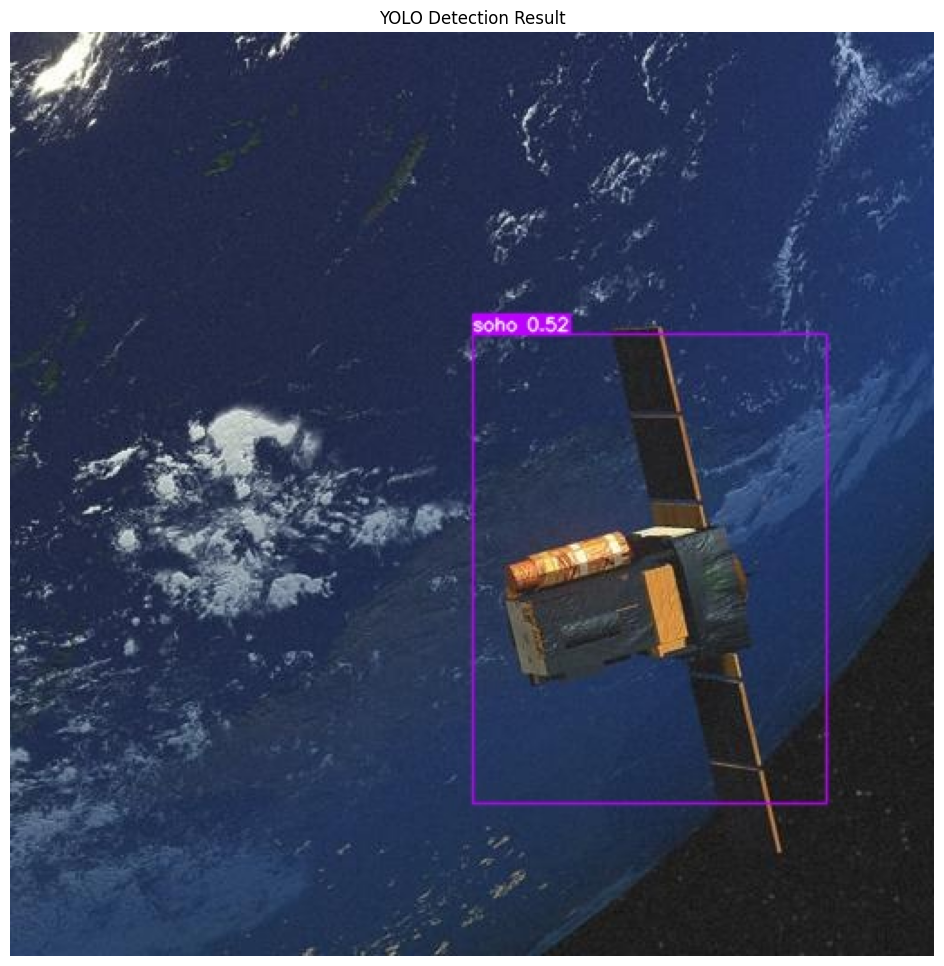

In [11]:


model = YOLO('/content/dep+sat_det.pt')

results = model.predict(
    source='soho.jpg',
    conf=0.25,
    line_width=1,
    save=True,
    save_txt=False,
    show=False
)

result_path = 'runs/detect/predict/soho.jpg'
plt.figure(figsize=(12, 12))
plt.imshow(mpimg.imread(result_path))
plt.axis('off')
plt.title('YOLO Detection Result')
plt.show()

# !rm -rf /content/runs
